In [11]:
from numba import jit
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

"simulate_riot_sectors" function test

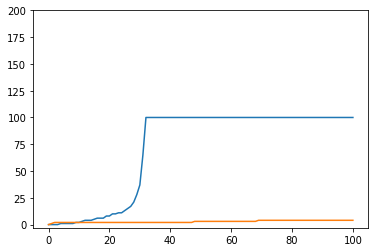

In [13]:
N = 200
average = 45
deviation = 12

agents = func.create_agents(N,average,deviation)
sector0_size = 100
sector1_size = 100

system = func.System(agents, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors(system, steps)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors" sector0 heatmap

100.00%


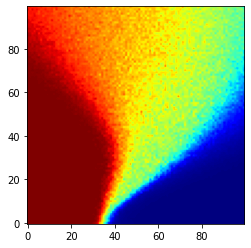

In [37]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors" total rioters heatmap

100.00%


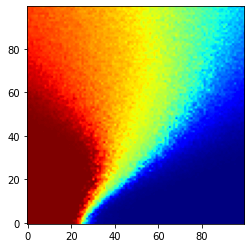

In [39]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


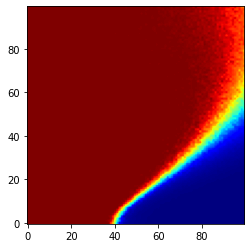

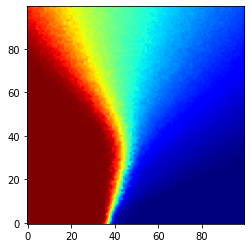

In [6]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

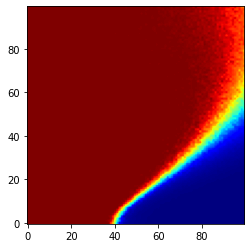

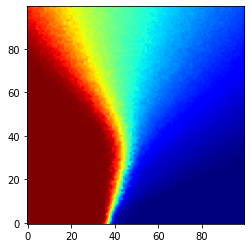

In [8]:
plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_exit" function test

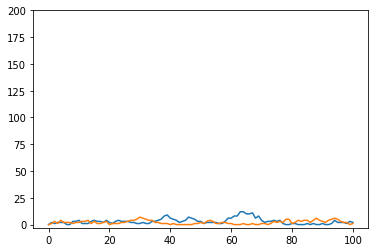

In [15]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_exit" sector0 heatmap

100.00%


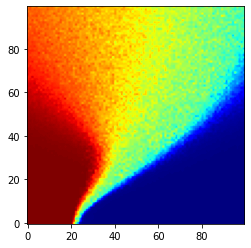

In [18]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_exit" total rioters heatmap

100.00%


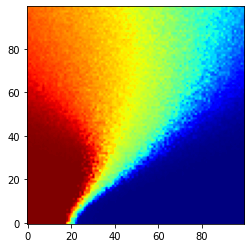

In [19]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_exit" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


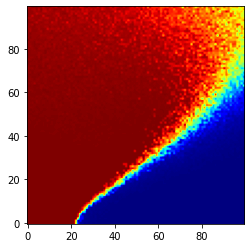

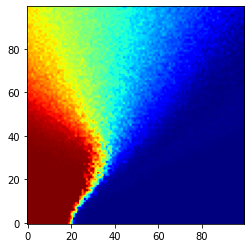

In [20]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 20
simulations = 10

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration" function test

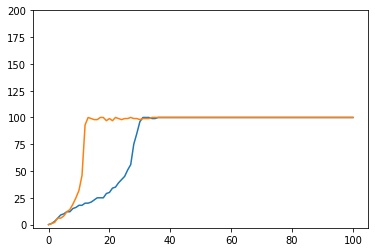

In [22]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration" sector0 heatmap

100.00%


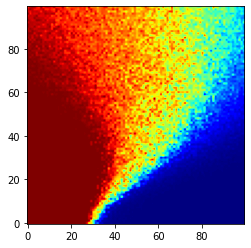

In [23]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 20
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration" total rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 20
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

4.04%


"simulate_riot_sectors_migration" sector with more rioters heatmap and sector with less rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 20
simulations = 10

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_exit" function test

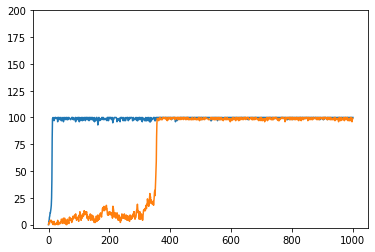

In [27]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit(system, steps,migration_probability)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration_exit" sector0 heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_exit" total rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_exit" sector with more rioters heatmap and sector with less rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_gregarious" function test

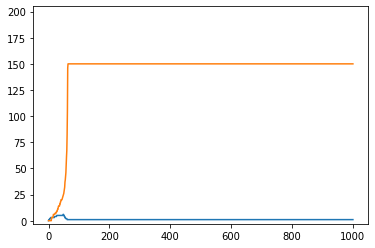

In [31]:
N = 200
average = 55
deviaition = 20

sector0_size = 150
sector1_size = 150
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

progression = func.simulate_riot_sectors_migration_gregarious(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious" sector0 heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious" total rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious" sector with more rioters heatmap and sector with less rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" function test

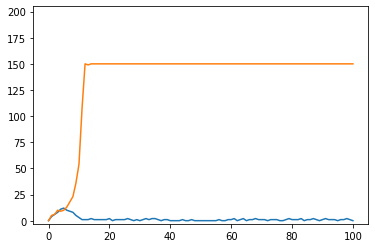

In [34]:
N = 200
average = 35
deviaition = 20

sector0_size = 150
sector1_size = 150
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" sector0 heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" total rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" sector with more rioters heatmap and sector with less rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()